<a href="https://colab.research.google.com/github/lamtruong2002/-BaitapAItuan9/blob/main/Fashion_Mnist_Ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils
     

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("X_train", X_train.shape)
print("y_train", y_train.shape)

4422102/4422102 [==============================] - 1s 0us/step
X_train (60000, 28, 28)
y_train (60000,)


<function matplotlib.pyplot.show(close=None, block=None)>

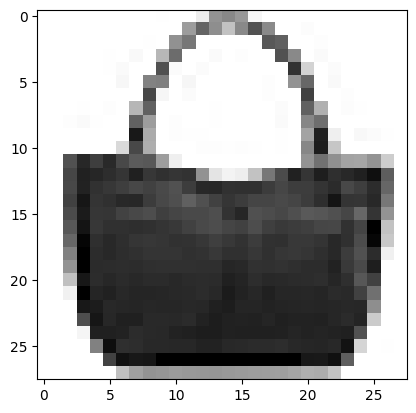

In [2]:
import matplotlib.pyplot as plt

hinh = X_train[100]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
#print('Ảnh:',x_train[45])

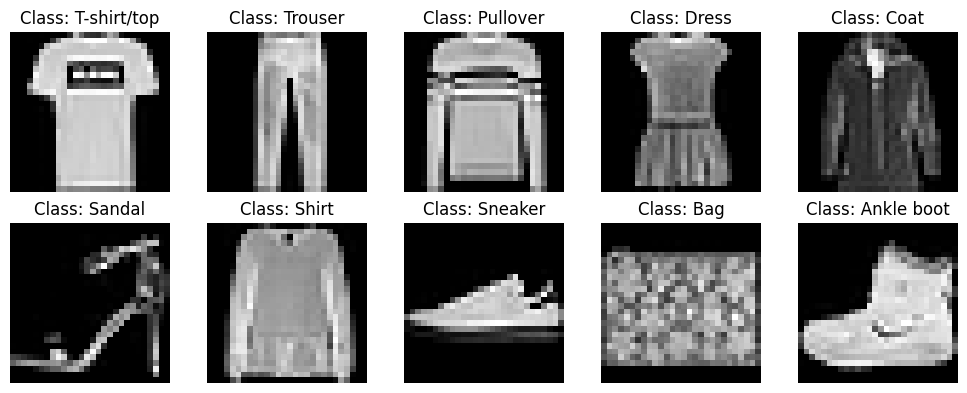

In [3]:
#0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"
class_labels_dict = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}
fig = plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    img = X_train[y_train == i][0]
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Class: {}".format(class_labels_dict[i]))
    plt.axis('off')
    
plt.tight_layout()

In [4]:
# Format the data
# Đầu vào cho mạng thần kinh phải là các vectơ đơn lẻ chứ không phải hình ảnh 2D. Do đó, 
# chúng ta cần phải định hình lại đầu vào để mỗi hình ảnh 28x28 trở thành một vectơ 784 chiều duy nhất ảnh dạng binary nên không nhân 3 kênh R - G -B.
# tuy nhiên điều này dẫn đến một số mất mát thông tin, vì các pixel hình ảnh nào nằm cạnh nhau trở nên kém rõ ràng hơn.
X_train = X_train.reshape(X_train.shape[0], 784)
print(X_train.shape[0])
X_test = X_test.reshape(X_test.shape[0], 784)
print(X_test.shape[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

60000
10000
Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
# Chuẩn hóa đầu vào(normalize) các đầu vào sao cho các giá trị điểm ảnh(pixel) từ 0 - 255 nằm trong khoảng từ 0 - 1
X_train /= 255
X_test /= 255
print(X_train[1])
print(X_test[2])

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.5378702e-05 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 6.3052675e-04 2.8911957e-03 1.5840061e-03 8.3044986e-04 7.3817762e-04
 6.6128414e-04 1.3379470e-03 2.5836218e-03 2.0453674e-03 2.4605924e-04
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.5378702e-05 0.0000000e+00 0.0000000e+00 0.0000000e+00
 7.5355632e-04 2.0915035e-03 3.3679355e-03 3.3217994e-03 3.5063438e-03
 3.6293734e-03 3.9215689e-03 3.9215689e-03 3.9215689e-03 3.9215689e-03
 3.3371781e-03 3.3064208e-03 3.9061899e-03 3.5524799e-03 2.4605922e-03
 6.9204153e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 2.1530181e-04 2.7066513e-03 3.4140716e-03 3.4448290e-03
 3.2602844e-03 3.1218762e-03 3.0449827e-03 3.0142253e-03 3.0757401e-03
 3.306

In [8]:
# Chuyển ma trận 1 chiều thành 10 chiều bằng one-hot encoder 
#chuyển đổi từ mảng lớp 1 chiều sang ma trận lớp 10 chiều bằng mã hóa one-hot là để sử dụng các mô hình phân loại đa lớp. 
#Trong các mô hình đó, đầu ra sẽ là một vectơ có số chiều bằng số lớp có thể có. 
#Mỗi giá trị trong vectơ đại diện cho xác suất của một lớp cụ thể. 
#Vì vậy, chuyển đổi các mảng lớp 1 chiều thành ma trận lớp 10 chiều sẽ cho phép chúng ta sử dụng chúng để đào tạo và đánh giá các mô hình phân loại đa lớp trên tập dữ liệu.

#Trong đoạn mã này, hàm np_utils.to_categorical được sử dụng để thực hiện mã hóa one-hot. 
#Tham số đầu tiên là mảng lớp 1 chiều cần được chuyển đổi và tham số thứ hai là số lớp có thể có.
#Hàm sẽ trả về một ma trận lớp 10 chiều, trong đó mỗi hàng đại diện cho một mẫu và mỗi cột đại diện cho một lớp, với giá trị 1 tại vị trí tương ứng với lớp của mẫu và giá trị 0 tại các vị trí còn lại.
num_classes = 10 
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [9]:
print(Y_train[2])
print(Y_test[2])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
model = Sequential() # Khai báo mô hình tuần tự 
model.add(Dense(512, input_shape=(784,))) # Thêm một lớp đầu vào dày đặc gồm 512 đơn vị
                                         # Hình dạng đầu vào là (784,) vì các đặc điểm là các vectơ 784 chiều
model.add(Activation('relu'))# Kích hoạt relu cho đầu ra
model.add(Dropout(0.2)) # Dropout giúp ngăn mô hình khớp quá mức trên dữ liệu huấn luyện
model.add(Dense(512)) # Add a hidden layer of 512 units
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes)) # Thêm một lớp đầu ra gồm 10 đơn vị, số lớp
model.add(Activation('softmax')) # Kích hoạt "softmax" đảm bảo đầu ra là phân phối xác suất hợp lệ
     

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
     

filepath="mlp-weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(X_train, 
                    Y_train,
                    batch_size=128, 
                    epochs=25,
                    verbose=1,
                    validation_data=(X_test,Y_test))
model.save('my_model')


Epoch 1/25
469/469 [==============================] - 18s 34ms/step - loss: 0.8952 - accuracy: 0.6751 - val_loss: 0.6209 - val_accuracy: 0.7701
Epoch 2/25
469/469 [==============================] - 10s 22ms/step - loss: 0.5597 - accuracy: 0.7944 - val_loss: 0.5247 - val_accuracy: 0.8108
Epoch 3/25
469/469 [==============================] - 11s 23ms/step - loss: 0.4835 - accuracy: 0.8251 - val_loss: 0.4758 - val_accuracy: 0.8251
Epoch 4/25
469/469 [==============================] - 11s 23ms/step - loss: 0.4420 - accuracy: 0.8399 - val_loss: 0.4437 - val_accuracy: 0.8357
Epoch 5/25
469/469 [==============================] - 9s 20ms/step - loss: 0.4159 - accuracy: 0.8480 - val_loss: 0.4193 - val_accuracy: 0.8477
Epoch 6/25
469/469 [==============================] - 11s 23ms/step - loss: 0.3964 - accuracy: 0.8546 - val_loss: 0.4296 - val_accuracy: 0.8439
Epoch 7/25
469/469 [==============================] - 10s 22ms/step - loss: 0.3788 - accuracy: 0.8616 - val_loss: 0.3958 - val_accuracy: 

In [11]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('test_accuracy',test_acc)
print('test_loss:',test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.3161 - accuracy: 0.8884
test_accuracy 0.8884000182151794
test_loss: 0.3161497712135315
